# ARG CLASS IDENTIFIER
This script has two objectives: first, to parse the table generated by AAAA et al (2021), who classified ARGs in four classes by their risk. Said classification of ARGs can be found on the supplementary material of the paper, and it contains 4050 ARGs separated by tab in a table alongside a bunch of information that we can't make use of with our data. SO, to go back to the topic itself: first objetive, to parse said table and get out the columns with usable information. And, secondaly, using said useful information, see how many ARGs of each class can be found on our samples.

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# Current wd: the script directory
print(os.getcwd())
os.chdir("../data/raw_data") # raw data directory, here's the table we need to parse
raw_dir = os.getcwd()
os.chdir("../clean_data") #clean data directory, here's our dataset
clean_dir = os.getcwd()
os.chdir("../../results/Class_res") # general results dir for these analysis
class_dir = os.getcwd()
print(os.getcwd())

/home/pak/Desktop/ARG-L/resistome/scripts
/home/pak/Desktop/ARG-L/resistome/results/Class_res


Let's start by parsing AAAAA et al database 

In [3]:
os.chdir(raw_dir)
raw_table = pd.read_table("Supplementary Data 4.txt", sep = "\t", header = 0)
raw_table

,ARG,Genotype,Phenotype,Enrichment,Mobility,ESKAPE_pathogen,Plasmid,Integron,Host_range,Human_associated_occ,Human_associated_abun,Enrichment_value,Rank
0,AAB20442,aminoglycoside__aac(3)-II,aminoglycoside,True,True,True,True,False,class,0.0470,0.001000,Human_only,I
1,YP_001966247,aminoglycoside__aac(3)-II,aminoglycoside,True,True,True,True,False,class,0.0840,0.004400,Human_only,I
2,NC_009838.1.5616796.p01,aminoglycoside__aac(3)-VI,aminoglycoside,True,True,True,True,False,family,0.0041,0.004200,322.544845,I
3,ABG77519,aminoglycoside__aac(6')-I,aminoglycoside,True,True,True,True,True,phylum,0.0690,0.004100,416.195466,I
4,AF231133.1.gene2.p01,aminoglycoside__aac(6')-I,aminoglycoside,True,True,True,True,False,phylum,0.0160,0.000390,Human_only,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,DQ018711.1.gene7.p01,vancomycin__vanY,vancomycin,NaN,NaN,NaN,NaN,False,NaN,0.4700,0.004400,21.69590399,Unassessed
4046,FJ349556.1.gene4.p01,vancomycin__vanY,vancomycin,NaN,NaN,NaN,NaN,False,NaN,0.4900,0.005400,7.498609207,Unassessed
4047,AF155139.2.gene5.p01,vancomycin__vanZ,vancomycin,NaN,NaN,NaN,NaN,False,NaN,0.1400,0.002700,1.699360876,Unassessed
4048,CAB61225,vancomycin__vanZ,vancomycin,NaN,NaN,NaN,NaN,False,NaN,0.0020,0.000045,0.001356539,Unassessed


That's the full table. From it, we only care about two columns: 
- "Genotype", as it contains the ARG names in the same manner we've got them annotated
- "Rank", which is the value we want to add to our existing dataset
"Phenotype" may prove uselful as well, so we can keep it too.
The idea is to extract the info from RAnk by matching to Genotype. However, as it stands, the info in Genotype can not be used (it contains a duplicate of phenotype as well as the ARG name), so we need to separate both. Given how the structure of the duplicity is shared among all Genotype cells (i.e., in all of them its antibiotic name + underscore + underscore + SOMETIMES SOME EXTRA INFO DIVIDED BY UNDERSOCRE + gene name), we can use pd.split() to extract the name out

In [4]:
filtered_tab = raw_table[["Genotype", "Phenotype", "Rank"]]
filtered_tab

,Genotype,Phenotype,Rank
0,aminoglycoside__aac(3)-II,aminoglycoside,I
1,aminoglycoside__aac(3)-II,aminoglycoside,I
2,aminoglycoside__aac(3)-VI,aminoglycoside,I
3,aminoglycoside__aac(6')-I,aminoglycoside,I
4,aminoglycoside__aac(6')-I,aminoglycoside,I
...,...,...,...
4045,vancomycin__vanY,vancomycin,Unassessed
4046,vancomycin__vanY,vancomycin,Unassessed
4047,vancomycin__vanZ,vancomycin,Unassessed
4048,vancomycin__vanZ,vancomycin,Unassessed


In [5]:
filtered_tab["ARG_name"] = filtered_tab["Genotype"].str.split("_").str[-1] 
# I'm extracting the last element and only separating by a single "_" to deal with those cases in which there's extra info after the two initial "_"
filtered_tab = filtered_tab[["ARG_name", "Rank"]]
filtered_tab

/tmp/ipykernel_4344/2503804919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tab["ARG_name"] = filtered_tab["Genotype"].str.split("_").str[-1]


,ARG_name,Rank
0,aac(3)-II,I
1,aac(3)-II,I
2,aac(3)-VI,I
3,aac(6')-I,I
4,aac(6')-I,I
...,...,...
4045,vanY,Unassessed
4046,vanY,Unassessed
4047,vanZ,Unassessed
4048,vanZ,Unassessed


We can now check some basic info about the dataset, such as which ARGs of which antibiotics it contains, what are the unique ARGs considered and how many ranks (there should be 5) there are

In [6]:
print(filtered_tab["ARG_name"].unique())
print("######################")
#print(filtered_tab["Phenotype"].unique())
print("######################")
print(filtered_tab["Rank"].unique())

['aac(3)-II' 'aac(3)-VI' "aac(6')-I" 'aadE' "ant(2'')-I" "aph(3')-I"
 "aph(3')-III" 'aph(6)-I'
 'bifunctional aminoglycoside N-acetyltransferase and aminoglycoside phosphotransferase'
 'rmtF' 'rmtG' 'bacA' 'blaZ' 'class A beta-lactamase' 'CMY-111' 'CMY-4'
 'CMY-6' 'CTX-M' 'CTX-M-129' 'CTX-M-15' 'CTX-M-2' 'CTX-M-24' 'CTX-M-55'
 'GES-11' 'IMP-4' 'KPC-2' 'KPC-4' 'KPC-6' 'mecA' 'mecR1' 'NDM-5' 'NDM-6'
 'OXA-1' 'OXA-10' 'OXA-4' 'SHV' 'SHV-1' 'SHV-5' '156' '169' 'TEM-1'
 'VEB-3' 'VIM-1' 'VIM-2' 'chloramphenicol acetyltransferase' 'catA' 'catB'
 'chloramphenicol exporter' 'cmlA' 'floR' 'mcr1' 'fosB' 'fusB' 'ermB'
 'ermC' 'ermT' 'lnuA' 'lnuB' 'mphA' 'mphB' 'msrA'
 'EmrB-QacA family major facilitator transporter' 'mdtE' 'mdtL' 'mepA'
 'norA' 'TolC' 'qnrA' 'qnrB' 'qnrS' 'tetL' 'tetM' 'protein' 'dfrA1'
 'dfrA12' 'dfrA14' 'dfrA15' 'dfrA17' 'dfrA25' 'dfrA5' 'dfrB1'
 'DNA-binding transcriptional regulator gadX' 'histidine kinase' 'vanY'
 'aadA' "aph(2'')-Ie" "aph(3')-VII" 'CMY-2' 'OXA-72' 'penA' 'RO

There's a bunch of ARG names that are still badly annotated (i.e.: gene name preceded by a bunch of extra, space separated information). The easiest is to fix them by hand, as they are few in total. There's also a bunch of ARG names that have come out as just numbers: these are variations of the beta lactamases SHV, TEM and NDM. As I know them not to be present in the ARGs considered by the resistome chip, I won't do anything to fix them.

In [7]:
# Let's identify them first
for ARG in filtered_tab["ARG_name"].unique():
    if " " in ARG: print(ARG)

bifunctional aminoglycoside N-acetyltransferase and aminoglycoside phosphotransferase
class A beta-lactamase
chloramphenicol acetyltransferase
chloramphenicol exporter
EmrB-QacA family major facilitator transporter
DNA-binding transcriptional regulator gadX
histidine kinase
streptomycin resistance protein
class B beta-lactamase
class C beta-lactamase
chloramphenicol and florfenicol resistance gene
kasugamycin resistance protein ksgA
antibiotic resistance rRNA adenine methyltransferase
cystathionine beta-lyase patB
viomycin phosphotransferase
bleomycin resistance protein
rifampin monooxygenase
16S rRNA methylase
bacterial regulatory protein LuxR
cAMP-regulatory protein
cob(I)alamin adenolsyltransferase
thiostrepton resistance methylase tsnR
transcriptional regulatory protein CpxR cpxR
truncated putative response regulator ArlR
response regulator EvgA


In [8]:
# As I see it, we can fix gadX, ksgA, patB, tsnR, cpxR, arlR and evgA. LuxR I know to be a fluorescent protein with no antibiotic resistance function
filtered_tab.loc[filtered_tab["ARG_name"] == "DNA-binding transcriptional regulator gadX", "ARG_name"] = "gadX"
filtered_tab.loc[filtered_tab["ARG_name"] == "kasugamycin resistance protein ksgA", "ARG_name"] = "ksgA"
filtered_tab.loc[filtered_tab["ARG_name"] == "cystathionine beta-lyase patB", "ARG_name"] = "patB"
filtered_tab.loc[filtered_tab["ARG_name"] == "thiostrepton resistance methylase tsnR", "ARG_name"] = "tsnR"
filtered_tab.loc[filtered_tab["ARG_name"] == "transcriptional regulatory protein CpxR cpxR", "ARG_name"] = "cpxR"
filtered_tab.loc[filtered_tab["ARG_name"] == "truncated putative response regulator ArlR", "ARG_name"] = "arlR"
filtered_tab.loc[filtered_tab["ARG_name"] == "response regulator EvgA", "ARG_name"] = "evgA"

# And let's check whether they remain
for ARG in filtered_tab["ARG_name"].unique():
    if " " in ARG: print(ARG)

bifunctional aminoglycoside N-acetyltransferase and aminoglycoside phosphotransferase
class A beta-lactamase
chloramphenicol acetyltransferase
chloramphenicol exporter
EmrB-QacA family major facilitator transporter
histidine kinase
streptomycin resistance protein
class B beta-lactamase
class C beta-lactamase
chloramphenicol and florfenicol resistance gene
antibiotic resistance rRNA adenine methyltransferase
viomycin phosphotransferase
bleomycin resistance protein
rifampin monooxygenase
16S rRNA methylase
bacterial regulatory protein LuxR
cAMP-regulatory protein
cob(I)alamin adenolsyltransferase


And drop existing duplicates to simplify everything

In [9]:
print(filtered_tab.shape)
# Now, a note: I'm going to drop duplicates, as I have no way of knowing just by name which of the duplicated ARGs I have
# As there are proteins with identical names BUT different rank ORDERED FROM MOST DANGEROUS TO LEAST DANGEROUS, by doing this
# I will be overestimating the dangerousness of my data. If I were to keep the last, I will be underestimagin it. Compromises.
filtered_tab = filtered_tab.drop_duplicates(subset = ["ARG_name"], keep = "first")
print(filtered_tab.shape)
filtered_tab

(4050, 2)
(872, 2)


,ARG_name,Rank
0,aac(3)-II,I
2,aac(3)-VI,I
3,aac(6')-I,I
7,aadE,I
9,ant(2'')-I,I
...,...,...
3952,dfrA24,Unassessed
3960,dfrB2,Unassessed
3962,methylase,Unassessed
3964,myrB,Unassessed


We should be able to add this extra information to what we already have by now

In [10]:
os.chdir(clean_dir)
filtered_tab.to_csv("rank_data.csv") #this will make accessing this data much faster if I need it in other analysis
resistome_data = pd.read_csv("ab_data_simple.csv", index_col = 0)
resistome_data

,Assay,antib,sample,Ct,place,type_f,type_g,or_seq,rel_n,rel_16,rel_ab,log_n
0,aacC2,Aminoglycoside,25.0,23.78,ardley,PUR,plastic,arg,9.246982,63533.093185,0.000146,-3.837
1,aacC2,Aminoglycoside,27.0,22.51,ardley,PUR,plastic,arg,22.233099,47206.304126,0.000471,-3.327
2,aacC2,Aminoglycoside,20.0,25.91,ardley,soil,control,arg,2.123244,30549.211132,0.000070,-4.158
3,aacC2,Aminoglycoside,22.0,24.56,ardley,EPS,plastic,arg,5.395106,25882.129152,0.000208,-3.681
4,aacA/aphD,Aminoglycoside,25.0,26.05,ardley,PUR,plastic,arg,1.927525,63533.093185,0.000030,-4.518
...,...,...,...,...,...,...,...,...,...,...,...,...
2449,dfrBmulti,Trimethoprim,26.0,15.72,ardley,PUR,plastic,arg,2421.029047,59703.528658,0.040551,-1.392
2450,dfrBmulti,Trimethoprim,27.0,15.77,ardley,PUR,plastic,arg,2338.837239,47206.304126,0.049545,-1.305
2451,dfrBmulti,Trimethoprim,22.0,16.84,ardley,EPS,plastic,arg,1116.863248,25882.129152,0.043152,-1.365
2452,dfrBmulti,Trimethoprim,23.0,17.13,ardley,EPS,plastic,arg,914.113241,23496.328208,0.038905,-1.410


In [11]:
# I'm going to work with .upper() string to fix possible problems with unmatching caps in the annotations on either side
it = 0
for chip_arg in [arg_nam.upper() for arg_nam in resistome_data.loc[resistome_data["or_seq"] == "arg"]["Assay"].unique()]:
    if chip_arg in [arg_nam.upper() for arg_nam in filtered_tab["ARG_name"].unique()]:
        it += 1
print(it)
it = 0
for chip_arg in [arg_nam.upper() for arg_nam in resistome_data["Assay"].unique()]:
    if chip_arg in [arg_nam.upper() for arg_nam in filtered_tab["ARG_name"].unique()]:
        it += 1
print(it)

79
85


There's 6 MGEs in the ARG database! To keep in mind

In [12]:
filtered_tab.rename(columns = {"ARG_name": "Assay"}, inplace = True)
filtered_tab

/tmp/ipykernel_4344/2930149425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tab.rename(columns = {"ARG_name": "Assay"}, inplace = True)


,Assay,Rank
0,aac(3)-II,I
2,aac(3)-VI,I
3,aac(6')-I,I
7,aadE,I
9,ant(2'')-I,I
...,...,...
3952,dfrA24,Unassessed
3960,dfrB2,Unassessed
3962,methylase,Unassessed
3964,myrB,Unassessed


In [16]:
os.chdir(class_dir)
full_df = resistome_data.join(filtered_tab.set_index("Assay"), on = "Assay")
print(full_df["Rank"].value_counts())
full_df["Rank"] = full_df["Rank"].fillna("Unassessed")
print(full_df["Rank"].value_counts())
full_df.to_csv("resistome_data_with_ranks.csv")
full_df

Rank
IV            193
III           104
I              99
Unassessed     46
II             14
Name: count, dtype: int64
Rank
Unassessed    2042
IV             193
III            104
I               99
II              14
Name: count, dtype: int64


,Assay,antib,sample,Ct,place,type_f,type_g,or_seq,rel_n,rel_16,rel_ab,log_n,Rank
0,aacC2,Aminoglycoside,25.0,23.78,ardley,PUR,plastic,arg,9.246982,63533.093185,0.000146,-3.837,Unassessed
1,aacC2,Aminoglycoside,27.0,22.51,ardley,PUR,plastic,arg,22.233099,47206.304126,0.000471,-3.327,Unassessed
2,aacC2,Aminoglycoside,20.0,25.91,ardley,soil,control,arg,2.123244,30549.211132,0.000070,-4.158,Unassessed
3,aacC2,Aminoglycoside,22.0,24.56,ardley,EPS,plastic,arg,5.395106,25882.129152,0.000208,-3.681,Unassessed
4,aacA/aphD,Aminoglycoside,25.0,26.05,ardley,PUR,plastic,arg,1.927525,63533.093185,0.000030,-4.518,Unassessed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,dfrBmulti,Trimethoprim,26.0,15.72,ardley,PUR,plastic,arg,2421.029047,59703.528658,0.040551,-1.392,Unassessed
2450,dfrBmulti,Trimethoprim,27.0,15.77,ardley,PUR,plastic,arg,2338.837239,47206.304126,0.049545,-1.305,Unassessed
2451,dfrBmulti,Trimethoprim,22.0,16.84,ardley,EPS,plastic,arg,1116.863248,25882.129152,0.043152,-1.365,Unassessed
2452,dfrBmulti,Trimethoprim,23.0,17.13,ardley,EPS,plastic,arg,914.113241,23496.328208,0.038905,-1.410,Unassessed


In [14]:
full_df["hacky"] = full_df["type_g"] + "-" + full_df["place"]
#all_data.head()
lala = full_df.groupby(["place", "type_g", "hacky", "antib", "or_seq", "Assay", "Rank"])["rel_n"].mean().reset_index()
arg_counts = lala.loc[lala["or_seq"] == "arg"].groupby(["place", "type_g", "hacky"])["Rank"].value_counts().reset_index()
arg_counts

,place,type_g,hacky,Rank,count
0,ardley,control,control-ardley,Unassessed,152
1,ardley,control,control-ardley,IV,19
2,ardley,control,control-ardley,III,11
3,ardley,control,control-ardley,I,10
4,ardley,control,control-ardley,II,2
5,ardley,plastic,plastic-ardley,Unassessed,224
6,ardley,plastic,plastic-ardley,IV,25
7,ardley,plastic,plastic-ardley,III,15
8,ardley,plastic,plastic-ardley,I,13
9,ardley,plastic,plastic-ardley,II,3


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

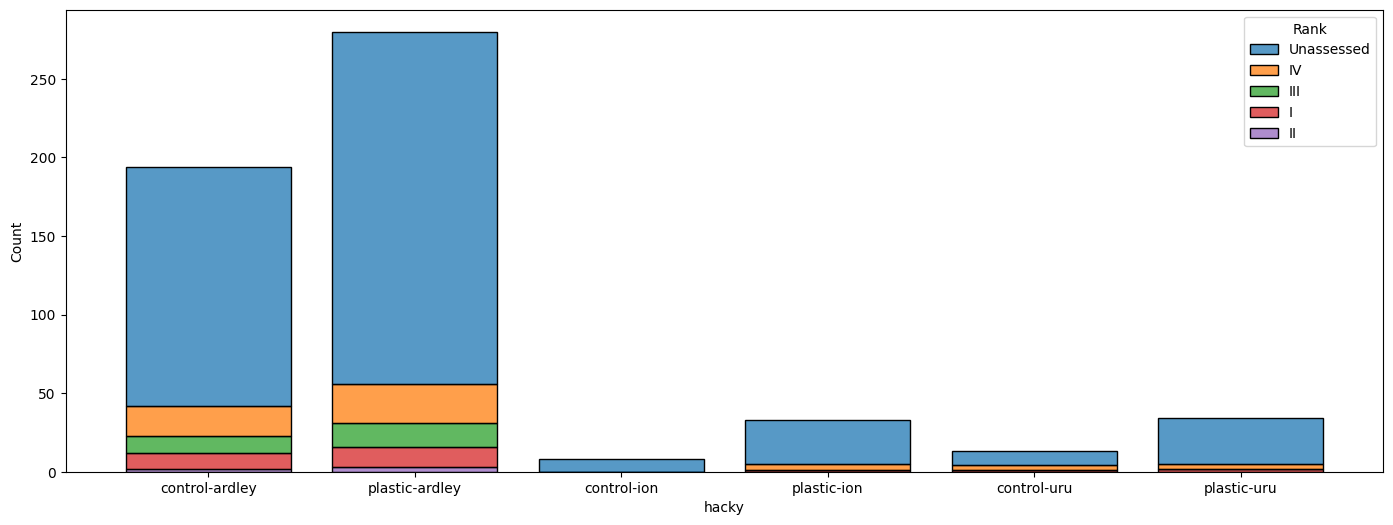

In [29]:
os.chdir(class_dir)
fig, ax = plt.subplots(figsize = (17,6))
ax = sns.histplot(arg_counts, x = "hacky", hue = "Rank", weights = "count", multiple = "stack", shrink = 0.8)
# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
plt.savefig("rank_counts.png", bbox_inches = "tight")
lala.to_csv("rank_counts.csv")

First question: **are there more ARGs in plastics or in soils**

In [30]:
import scipy.stats as stat

In [54]:
total_counts = full_df.loc[full_df["or_seq"] == "arg"][["type_g", "place", "sample"]].value_counts().reset_index()
print(stat.shapiro(total_counts.loc[total_counts["type_g"] == "plastic"]["count"]))
print(stat.shapiro(total_counts.loc[total_counts["type_g"] == "control"]["count"]))
print(stat.levene(total_counts.loc[total_counts["type_g"] == "plastic"]["count"], 
                  total_counts.loc[total_counts["type_g"] == "control"]["count"]))
print(stat.ttest_ind(total_counts.loc[total_counts["type_g"] == "plastic"]["count"], 
                     total_counts.loc[total_counts["type_g"] == "control"]["count"]))
total_counts

ShapiroResult(statistic=0.6720022228383847, pvalue=8.43140345289089e-05)
ShapiroResult(statistic=0.6412782510913388, pvalue=8.360469504623057e-05)
LeveneResult(statistic=1.6510014955533547, pvalue=0.21060051514599035)
TtestResult(statistic=1.516831529471413, pvalue=0.14185356430750512, df=25.0)


,type_g,place,sample,count
0,plastic,ardley,22.0,238
1,plastic,ardley,24.0,233
2,plastic,ardley,25.0,227
3,plastic,ardley,23.0,227
4,plastic,ardley,27.0,221
5,plastic,ardley,26.0,208
6,control,ardley,20.0,164
7,control,ardley,19.0,131
8,control,ardley,21.0,107
9,plastic,ion,17.0,23


Interpretation: while the number of ARGs varies from case to case, globally, we can't say that eithery sample typology has more or less ARGs than the other.
Next question: **¿are there differences when it comes down to the number of ARGs of an specific rank at the global level?**

Mind you, given the stark differences in the number of total ARGs found between sampling places, we need to re-think the question, as we cannot compare numbers of ARGs as is: the only differences found if we do so would be between lake and ardley samples. Thus, we can study **whether within the total of ARGs found in each sample type a specific rank is more or less represented**. Or, in other words, compare percentages. 
To do so, first we need to be able to obtain percentages 

In [67]:
global_counts = full_df.loc[full_df["or_seq"] == "arg"][["type_g", "place", "sample", "Rank"]].value_counts().reset_index()
rankI_counts = global_counts.loc[global_counts["Rank"] == "I"]
# By merging with total_counts we can easily compare the total of ARGs in a particular sample and the number of ARGs within that total that pertain to our rank of interest
rankI_counts = rankI_counts.merge(total_counts, on = "sample", how = "outer"  # we need to do the outer merge to not lose those samples in which there are no ARGs of the rank
                          ).drop(columns = ["type_g_x", "place_x", "Rank"] #these columns are just duplicated, no value in them
                          ).fillna(0 #only zeroes are those of count_x, aka, those of the samples in which there are no ARGs of the rank we want
                          ).rename(columns = {"count_x": "rank_count", "count_y": "total_count", "type_g_y":"type_g"}
                                  )
rankI_counts["rank_pct"] = (rankI_counts["rank_count"] / rankI_counts["total_count"]) * 100 

# And now we can do stats
print(stat.shapiro(rankI_counts.loc[rankI_counts["type_g"] == "plastic"]["rank_pct"]))
print(stat.shapiro(rankI_counts.loc[rankI_counts["type_g"] == "control"]["rank_pct"]))
print(stat.levene(rankI_counts.loc[rankI_counts["type_g"] == "plastic"]["rank_pct"], 
                  rankI_counts.loc[rankI_counts["type_g"] == "control"]["rank_pct"]))
print(stat.mannwhitneyu(rankI_counts.loc[rankI_counts["type_g"] == "plastic"]["rank_pct"], 
                     rankI_counts.loc[rankI_counts["type_g"] == "control"]["rank_pct"]))
rankI_counts.head()


ShapiroResult(statistic=0.8407882637693007, pvalue=0.010000843718944932)
ShapiroResult(statistic=0.5404174865741037, pvalue=4.689152042109233e-06)
LeveneResult(statistic=0.5672980877364475, pvalue=0.4583693949283878)
MannwhitneyuResult(statistic=108.0, pvalue=0.3073491295082341)


,sample,rank_count,type_g,place_y,total_count,rank_pct
0,1.0,0.0,control,uru,8,0.0
1,2.0,0.0,control,uru,4,0.0
2,3.0,0.0,control,uru,4,0.0
3,4.0,1.0,control,uru,4,25.0
4,5.0,0.0,control,uru,4,0.0


So, the interpretation: **rank I ARGs are not differentialy represented in plastic samples when compared to soil samples**. 
Lets see rank II

In [68]:
rankII_counts = global_counts.loc[global_counts["Rank"] == "II"]
# First, obtain the pcts
rankII_counts = rankII_counts.merge(total_counts, on = "sample", how = "outer"  
                          ).drop(columns = ["type_g_x", "place_x", "Rank"] 
                          ).fillna(0 
                          ).rename(columns = {"count_x": "rank_count", "count_y": "total_count", "type_g_y":"type_g"}
                                  )
rankII_counts["rank_pct"] = (rankII_counts["rank_count"] / rankII_counts["total_count"]) * 100 

# And now we can do stats
print(stat.shapiro(rankII_counts.loc[rankII_counts["type_g"] == "plastic"]["rank_pct"]))
print(stat.shapiro(rankII_counts.loc[rankII_counts["type_g"] == "control"]["rank_pct"]))
print(stat.levene(rankII_counts.loc[rankII_counts["type_g"] == "plastic"]["rank_pct"], 
                  rankII_counts.loc[rankII_counts["type_g"] == "control"]["rank_pct"]))
print(stat.mannwhitneyu(rankII_counts.loc[rankII_counts["type_g"] == "plastic"]["rank_pct"], 
                     rankII_counts.loc[rankII_counts["type_g"] == "control"]["rank_pct"]))
rankII_counts.head()

ShapiroResult(statistic=0.6672004697776317, pvalue=7.509177202098493e-05)
ShapiroResult(statistic=0.34499120525171123, pvalue=2.2434019096637374e-08)
LeveneResult(statistic=0.5184210893285953, pvalue=0.4781941652325872)
MannwhitneyuResult(statistic=110.0, pvalue=0.16853975843594804)


,sample,rank_count,type_g,place_y,total_count,rank_pct
0,1.0,0.0,control,uru,8,0.0
1,2.0,0.0,control,uru,4,0.0
2,3.0,0.0,control,uru,4,0.0
3,4.0,0.0,control,uru,4,0.0
4,5.0,0.0,control,uru,4,0.0


Once again, **rank II ARGs are not differentially represented in plastic samples**.
Let's go for rank III

In [69]:
rankIII_counts = global_counts.loc[global_counts["Rank"] == "III"]
# First, obtain the pcts
rankIII_counts = rankIII_counts.merge(total_counts, on = "sample", how = "outer"  
                          ).drop(columns = ["type_g_x", "place_x", "Rank"] 
                          ).fillna(0 
                          ).rename(columns = {"count_x": "rank_count", "count_y": "total_count", "type_g_y":"type_g"}
                                  )
rankIII_counts["rank_pct"] = (rankIII_counts["rank_count"] / rankIII_counts["total_count"]) * 100 

# And now we can do stats
print(stat.shapiro(rankIII_counts.loc[rankIII_counts["type_g"] == "plastic"]["rank_pct"]))
print(stat.shapiro(rankIII_counts.loc[rankIII_counts["type_g"] == "control"]["rank_pct"]))
print(stat.levene(rankIII_counts.loc[rankIII_counts["type_g"] == "plastic"]["rank_pct"], 
                  rankIII_counts.loc[rankIII_counts["type_g"] == "control"]["rank_pct"]))
print(stat.mannwhitneyu(rankIII_counts.loc[rankIII_counts["type_g"] == "plastic"]["rank_pct"], 
                     rankIII_counts.loc[rankIII_counts["type_g"] == "control"]["rank_pct"]))
rankIII_counts.head()

ShapiroResult(statistic=0.647890179948072, pvalue=4.754429795484222e-05)
ShapiroResult(statistic=0.6204100162284765, pvalue=4.5706253265549184e-05)
LeveneResult(statistic=0.5085937546245122, pvalue=0.4823527523453247)
MannwhitneyuResult(statistic=100.0, pvalue=0.4988878777221407)


,sample,rank_count,type_g,place_y,total_count,rank_pct
0,1.0,0.0,control,uru,8,0.0
1,2.0,0.0,control,uru,4,0.0
2,3.0,0.0,control,uru,4,0.0
3,4.0,0.0,control,uru,4,0.0
4,5.0,0.0,control,uru,4,0.0


In [70]:
rankIV_counts = global_counts.loc[global_counts["Rank"] == "IV"]
# First, obtain the pcts
rankIV_counts = rankIV_counts.merge(total_counts, on = "sample", how = "outer"  
                          ).drop(columns = ["type_g_x", "place_x", "Rank"] 
                          ).fillna(0 
                          ).rename(columns = {"count_x": "rank_count", "count_y": "total_count", "type_g_y":"type_g"}
                                  )
rankIV_counts["rank_pct"] = (rankIV_counts["rank_count"] / rankIV_counts["total_count"]) * 100 

# And now we can do stats
print(stat.shapiro(rankIV_counts.loc[rankIV_counts["type_g"] == "plastic"]["rank_pct"]))
print(stat.shapiro(rankIV_counts.loc[rankII_counts["type_g"] == "control"]["rank_pct"]))
print(stat.levene(rankIV_counts.loc[rankII_counts["type_g"] == "plastic"]["rank_pct"], 
                  rankIV_counts.loc[rankII_counts["type_g"] == "control"]["rank_pct"]))
print(stat.mannwhitneyu(rankIV_counts.loc[rankIV_counts["type_g"] == "plastic"]["rank_pct"], 
                     rankIV_counts.loc[rankIV_counts["type_g"] == "control"]["rank_pct"]))
rankIV_counts.head()

ShapiroResult(statistic=0.8775356490764883, pvalue=0.03552931221507116)
ShapiroResult(statistic=0.7495520851923414, pvalue=0.0020508050444472477)
LeveneResult(statistic=2.424494934223947, pvalue=0.13202191182189224)
MannwhitneyuResult(statistic=93.0, pvalue=0.8197462549908139)


,sample,rank_count,type_g,place_y,total_count,rank_pct
0,1.0,3.0,control,uru,8,37.5
1,2.0,0.0,control,uru,4,0.0
2,3.0,1.0,control,uru,4,25.0
3,4.0,0.0,control,uru,4,0.0
4,5.0,0.0,control,uru,4,0.0


In [71]:
rankU_counts = global_counts.loc[global_counts["Rank"] == "Unassessed"]
# First, obtain the pcts
rankU_counts = rankU_counts.merge(total_counts, on = "sample", how = "outer"  
                          ).drop(columns = ["type_g_x", "place_x", "Rank"] 
                          ).fillna(0 
                          ).rename(columns = {"count_x": "rank_count", "count_y": "total_count", "type_g_y":"type_g"}
                                  )
rankU_counts["rank_pct"] = (rankU_counts["rank_count"] / rankU_counts["total_count"]) * 100 

# And now we can do stats
print(stat.shapiro(rankU_counts.loc[rankU_counts["type_g"] == "plastic"]["rank_pct"]))
print(stat.shapiro(rankU_counts.loc[rankU_counts["type_g"] == "control"]["rank_pct"]))
print(stat.levene(rankU_counts.loc[rankU_counts["type_g"] == "plastic"]["rank_pct"], 
                  rankU_counts.loc[rankU_counts["type_g"] == "control"]["rank_pct"]))
print(stat.mannwhitneyu(rankU_counts.loc[rankU_counts["type_g"] == "plastic"]["rank_pct"], 
                     rankU_counts.loc[rankU_counts["type_g"] == "control"]["rank_pct"]))
rankU_counts.head()

ShapiroResult(statistic=0.8460487444711979, pvalue=0.011923623511610141)
ShapiroResult(statistic=0.8114972820716084, pvalue=0.013329186192208733)
LeveneResult(statistic=4.020118189408538, pvalue=0.05590229652331427)
MannwhitneyuResult(statistic=98.0, pvalue=0.6361633270158236)


,sample,rank_count,type_g,place_y,total_count,rank_pct
0,1.0,5,control,uru,8,62.5
1,2.0,4,control,uru,4,100.0
2,3.0,3,control,uru,4,75.0
3,4.0,3,control,uru,4,75.0
4,5.0,4,control,uru,4,100.0


In [39]:
lala = full_df.loc[full_df["or_seq"] == "arg"][["type_g", "Assay", "Rank"]].groupby(["type_g", "Rank"]).value_counts().reset_index()
lala = lala[["type_g", "Rank"]].groupby(["type_g", "Rank"]).value_counts()
lala

type_g   Rank      
control  I              10
         II              2
         III            11
         IV             20
         Unassessed    158
plastic  I              13
         II              3
         III            15
         IV             25
         Unassessed    224
Name: count, dtype: int64